<img src="https://github.com/gantian127/bmi_era5/blob/master/docs/source/_static/bmi_era5_logo.png?raw=true" width='600' align='center'></a>

# Basic Info
This Jupyter Notebook was created by Tian Gan. You can test this Jupyter Notebook through [Binder](https://mybinder.org/v2/gh/gantian127/bmi_era5/master?filepath=notebooks%2Fbmi_era5.ipynb) or [HydroShare](https://www.hydroshare.org/resource/765e4e8bebab4eea8d72ee447a27c2fa/).

If you have any suggestion to improve the current functions of the bmi_era5 package, please create a github issue [here](https://github.com/gantian127/bmi_era5/issues).

Suggested citation: Gan, T. (2021). Jupyter Notebooks for the ERA5 Data Component, HydroShare, https://www.hydroshare.org/resource/765e4e8bebab4eea8d72ee447a27c2fa/

## Quick Start Tutorial 

This notebook will demonstrate how to use the bmi_era5 package to download the [ERA5](https://confluence.ecmwf.int/display/CKB/ERA5) datasets. 

This tutorial includes the following sections:

1. [Brief Introduction](#section1)

   This section provides basic information about bmi_era5 package. 
   <br>
   
2. [Start with Examples](#section2)
   
   This section provides two examples to demonstrate how to use the CDS API and the bmi_era5 package to download the same ERA5 dataset for visualization.
   <br>

<a id='section1'></a>
## 1. Brief Introduction

bmi_era5 package is an implementation of the Basic Model Interface ([BMI](https://bmi.readthedocs.io/en/latest/)) for the [ERA5](https://confluence.ecmwf.int/display/CKB/ERA5) dataset. This package uses the [CDS API](https://cds.climate.copernicus.eu/api-how-to) to download the ERA5 dataset and wraps the dataset with BMI for data control and query (currently support 3 dimensional ERA5 dataset). This package is not implemented for people to use but is the key element to convert the ERA5 dataset into a data component for the [PyMT](https://pymt.readthedocs.io/en/latest/?badge=latest) modeling framework developed by Community Surface Dynamics Modeling System ([CSDMS](https://csdms.colorado.edu/wiki/Main_Page)).

Let's first use a helper function to install the CDS API and create the CDS API Key file. The install_cds( ) function will ask for your CDS API Key. So please make sure you have already created an account at the [CDS registration page](https://cds.climate.copernicus.eu/#!/home) and obtained your CDS API Key. For more details please check [here](https://cds.climate.copernicus.eu/api-how-to).

In [ ]:
from installation import install_cds
install_cds()

After you successfully run the helper function above, use the following command to install the bmi_era5 package. 

In [ ]:
!pip install bmi_era5

<a id='section2'></a>
## 2. Start with Examples

The CDS API (Climate Data Store Application Program Interface) is a service providing Python based programmatic access to CDS data. ERA5 is one of the CDS data products that can be accessed using the CDS API.  

In bmi_era5 package, BmiEra5 class is designed to download the ERA5 dataset and wrap the dataset with BMI (currently support 3 dimensional ERA5 dataset). The following examples demonstrate how to download the same dataset using the CDS API and BmiEra5 for data visualization. 

### Example 1: use CDS API to download the ERA5 data 

Import cdsapi module and create an object from the "Client" class. Use the retrieve( ) method to make a request for data download. You can check the details of the parameter settings for a request from the [CDS web interface](https://confluence.ecmwf.int/display/CKB/How+to+download+ERA5#HowtodownloadERA5-3-DownloadingonlineERA5familydatathroughtheCDSwebinterface). 

In this example, it downloads the ERA5 hourly reanalysis data on single level for 2 metre temperature and total precipitation in Colorado on Jan 1st, 2021. The grid resolution is 0.25 degree. The dataset is saved in a netCDF file.

In [1]:
import cdsapi
import xarray
import matplotlib.pyplot as plt

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': ['2m_temperature', 'total_precipitation'],
        'year': '2021',
        'month': '01',
        'day': '01',
        'time': [ '00:00', '01:00', '02:00'],
        'area': [ 41, -109, 36, -102],
        'grid': [0.25, 0.25]
    },
    'download.nc')

2022-07-25 13:06:33,539 INFO Welcome to the CDS
2022-07-25 13:06:33,540 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-07-25 13:06:33,734 INFO Request is completed
2022-07-25 13:06:33,735 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data6/adaptor.mars.internal-1658774942.5357492-32230-18-65d30476-8d1d-438e-ae7b-070df90bd7bf.nc to download.nc (8.6K)
2022-07-25 13:06:34,525 INFO Download rate 10.9K/s                                


Result(content_length=8840,content_type=application/x-netcdf,location=https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data6/adaptor.mars.internal-1658774942.5357492-32230-18-65d30476-8d1d-438e-ae7b-070df90bd7bf.nc)

Use xarray to load the netCDF file and select the data for the 2 metre temperature on 2021-01-01 at 00:00. 

In [2]:
# load netCDF data
dataset = xarray.open_dataset('download.nc')

# select 2 metre temperature on 2021-01-01 at 00:00
air_temp = dataset.t2m.isel(time=0)

The temperature dataset is loaded as a DataArray object (xarray). You can directly plot the data using its plot( ) method.

Text(0.5, 1.0, '2 metre temperature in Colorado on Jan 1st, 2021 at 00:00')

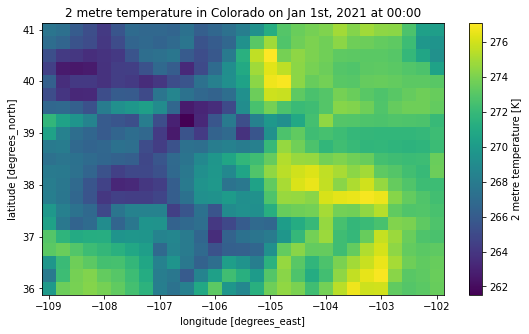

In [3]:
# plot data
air_temp.plot(figsize=(9,5))
plt.title('2 metre temperature in Colorado on Jan 1st, 2021 at 00:00')

### Example 2: use BmiEra5 class to download the ERA5 data (Demonstration of how to use BMI)

Import BmiEra5 class and instantiate it. A configuration file (yaml file) is required to provide the parameter settings for data download. An example config_file.yaml file is provided in the same folder with this Jupyter Notebook. 

In [4]:
from bmi_era5 import BmiEra5
import numpy as np
import matplotlib.pyplot as plt

data_comp = BmiEra5()
data_comp.initialize('config_file.yaml')

2022-07-25 13:06:41,935 INFO Welcome to the CDS
2022-07-25 13:06:41,938 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-07-25 13:06:42,134 INFO Request is completed
2022-07-25 13:06:42,136 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data6/adaptor.mars.internal-1658774942.5357492-32230-18-65d30476-8d1d-438e-ae7b-070df90bd7bf.nc to single_hour.nc (8.6K)
2022-07-25 13:06:42,316 INFO Download rate 48.2K/s                                


If you check the contents in the config_file.yaml, you will find out that the parameters are the same as the parameters specified in the retrieve( ) method from the CDS API.

In [5]:
!cat config_file.yaml

bmi-era5:
  name: reanalysis-era5-single-levels
  request:
    variable:
      - 2m_temperature
      - total_precipitation
    product_type: reanalysis
    year: 2021
    month: 01
    day: 01
    time:
      - '00:00'
      - '01:00'
      - '02:00'
    format: netcdf
    area:
      - 41
      - -109
      - 36
      - -102
    grid:
      - 0.25
      - 0.25
  path: single_hour.nc


Use variable related methods from BmiEra5 class to check the variable information of the ERA5 dataset. 

In [6]:
# get variable info
for var_name in  data_comp.get_output_var_names():
    var_unit = data_comp.get_var_units(var_name)
    var_location = data_comp.get_var_location(var_name)
    var_type = data_comp.get_var_type(var_name)
    var_grid = data_comp.get_var_grid(var_name)
    var_itemsize = data_comp.get_var_itemsize(var_name)
    var_nbytes = data_comp.get_var_nbytes(var_name)
    print('variable_name: {} \nvar_unit: {} \nvar_location: {} \nvar_type: {} \nvar_grid: {} \nvar_itemsize: {}' 
            '\nvar_nbytes: {} \n'. format(var_name, var_unit, var_location, var_type, var_grid, var_itemsize, var_nbytes))


variable_name: 2 metre temperature 
var_unit: K 
var_location: node 
var_type: float64 
var_grid: 0 
var_itemsize: 2
var_nbytes: 1218 

variable_name: Total precipitation 
var_unit: m 
var_location: node 
var_type: float64 
var_grid: 0 
var_itemsize: 2
var_nbytes: 1218 



Use time related methods from BmiEra5 class to check the time information of the ERA5 dataset. The time values are stored in a format which follows [CF convention](http://cfconventions.org/Data/cf-conventions/cf-conventions-1.8/cf-conventions.pdf).

In [7]:
# get time info
start_time = data_comp.get_start_time()
end_time = data_comp.get_end_time()
time_step = data_comp.get_time_step()
time_unit = data_comp.get_time_units()
time_steps = int((end_time - start_time)/time_step) + 1
print('start_time:{} \nend_time:{} \ntime_step:{} \ntime_unit:{} \ntime_steps:{}'.format(
    start_time, end_time, time_step, time_unit, time_steps))

start_time:1060680.0 
end_time:1060682.0 
time_step:1.0 
time_unit:hours since 1900-01-01 00:00:00.0 
time_steps:3


Use grid related methods of BmiEra5 class to check the grid information of the ERA5 dataset. 

In [8]:
# get variable grid info 
grid_rank = data_comp.get_grid_rank(var_grid) 
grid_size = data_comp.get_grid_size(var_grid)

grid_shape = np.empty(grid_rank, int)
data_comp.get_grid_shape(var_grid, grid_shape)

grid_spacing = np.empty(grid_rank)
data_comp.get_grid_spacing(var_grid, grid_spacing)

grid_origin = np.empty(grid_rank)
data_comp.get_grid_origin(var_grid, grid_origin)

print('grid_rank: {} \ngrid_size: {} \ngrid_shape: {} \ngrid_spacing: {} \ngrid_origin: {}'.format(
    grid_rank, grid_size, grid_shape, grid_spacing, grid_origin))

grid_rank: 2 
grid_size: 609 
grid_shape: [21 29] 
grid_spacing: [0.25 0.25] 
grid_origin: [  36. -109.]


Use get_value( ) method to get the 2 meter temperature data at the first time step (2021-01-01 00:00) as a numpy 2D array. 

In [9]:
# get variable data 
data = np.empty(grid_size, var_type)
data_comp.get_value('2 metre temperature', data)
data_2D = data.reshape(grid_shape)

Plot the 2 meter temperature data.

Text(0.5, 1.0, '2 metre temperature in Colorado on Jan 1st, 2021 at 00:00')

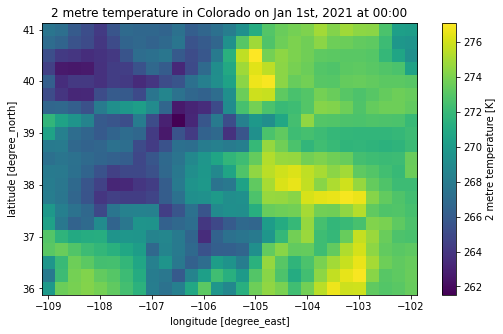

In [10]:
# get X, Y extent for plot
min_y, min_x = grid_origin
max_y = min_y + grid_spacing[0]*(grid_shape[0]-1)
max_x = min_x + grid_spacing[1]*(grid_shape[1]-1)
dy = grid_spacing[0]/2
dx = grid_spacing[1]/2
extent = [min_x - dx, max_x + dx, min_y - dy, max_y + dy]

# plot data
fig, ax = plt.subplots(1,1, figsize=(9,5))
im = ax.imshow(data_2D, extent=extent)
cbar = fig.colorbar(im)
cbar.set_label('2 metre temperature [K]')
plt.xlabel('longitude [degree_east]')
plt.ylabel('latitude [degree_north]')
plt.title('2 metre temperature in Colorado on Jan 1st, 2021 at 00:00')